<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных-и-библиотек" data-toc-modified-id="Загрузка-данных-и-библиотек-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных и библиотек</a></span></li><li><span><a href="#Исследование-датасетов" data-toc-modified-id="Исследование-датасетов-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование датасетов</a></span></li><li><span><a href="#Заполнение-пропусков-с-помощью-Imputer" data-toc-modified-id="Заполнение-пропусков-с-помощью-Imputer-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Заполнение пропусков с помощью Imputer</a></span></li><li><span><a href="#Исследование-признаков" data-toc-modified-id="Исследование-признаков-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследование признаков</a></span></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Обучение моделей</a></span><ul class="toc-item"><li><span><a href="#CatBoostClassifier" data-toc-modified-id="CatBoostClassifier-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>CatBoostClassifier</a></span></li><li><span><a href="#LightGBM" data-toc-modified-id="LightGBM-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>LightGBM</a></span></li></ul></li><li><span><a href="#Оценка-точности-моделей" data-toc-modified-id="Оценка-точности-моделей-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Оценка точности моделей</a></span><ul class="toc-item"><li><span><a href="#Оценка-точности:-CatBoostClassifier" data-toc-modified-id="Оценка-точности:-CatBoostClassifier-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Оценка точности: CatBoostClassifier</a></span></li><li><span><a href="#Оценка-точности:-LightGBM" data-toc-modified-id="Оценка-точности:-LightGBM-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Оценка точности: LightGBM</a></span></li></ul></li><li><span><a href="#Выгрузка-итоговых-решений" data-toc-modified-id="Выгрузка-итоговых-решений-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Выгрузка итоговых решений</a></span><ul class="toc-item"><li><span><a href="#Выгрузка-итогового-решения-CatBoostClassifier-в-&quot;.csv&quot;" data-toc-modified-id="Выгрузка-итогового-решения-CatBoostClassifier-в-&quot;.csv&quot;-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Выгрузка итогового решения CatBoostClassifier в ".csv"</a></span></li><li><span><a href="#Выгрузка-итогового-решения-LightGBM-в-&quot;.csv&quot;" data-toc-modified-id="Выгрузка-итогового-решения-LightGBM-в-&quot;.csv&quot;-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Выгрузка итогового решения LightGBM в ".csv"</a></span></li></ul></li></ul></div>

    Постановщик задачи: Иннополис
    Автор решения: Саханенко Дмитрий

# Классификация агрокультур на основе изменения показателя вегетационных индексов во временной последовательности

Данные дистанционного зондирования Земли из космоса позволяют решать большое количество производственных задач. Например, определять культуры растений на основе анализа временных рядов значений вегетационных индексов (NDVI), получаемых на протяжении вегетационного периода (периода роста и развития растений).

NDVI – это индекс, определяемый по поглощению и отражению растениями лучей красной и ближней инфракрасной зоны спектра при анализе изображений космоснимков. По значению этого индекса можно судить о развитии зеленой массы растений во время вегетации. Чем больше зеленой биомассы на полях, тем выше значение NDVI.

Общая посевная площадь в России в 2022 году составила более 81 млн га. Для грамотного планирования сельскохозяйственного производства в масштабах страны, применения технологий точного земледелия, проведения мероприятий по защите растений, оценки урожайности критически важным является распознавание культур растений, произрастающих на каждом конкретном поле.

Перед участниками чемпионата стоит задача классификации агрокультур на основе изменения показателя вегетационных индексов во временной последовательности. Созданная за время чемпионата модель поможет оптимизировать рабочие процессы в сфере сельского хозяйства, обеспечить органы власти актуальными и достоверными сведениями, увеличить социальный, инвестиционный и производственный потенциал отрасли, а также повысить достоверность и удобство использования информации о сельскохозяйственных объектах.

* Подробное описание задачи и данные будут опубликованы в момент старта чемпионата 25 октября 2022 в 11:00 (МСК).

## Загрузка данных и библиотек

In [1]:
# импортируем библиотеки 
%matplotlib inline

import os
import math
import time
import itertools 
import urllib.request
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from pathlib import Path

#from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split, cross_val_score, cross_val_predict
from sklearn.model_selection import cross_val_score

from sklearn.metrics import recall_score, confusion_matrix, precision_recall_curve 
from sklearn.metrics import roc_curve, roc_auc_score, precision_score, accuracy_score

from catboost import CatBoostClassifier, Pool

from sklearn.pipeline import Pipeline
from lightgbm import LGBMClassifier

import phik
from phik.report import plot_correlation_matrix
from phik import report

import warnings
warnings.filterwarnings('ignore')

from sklearn import model_selection
import pickle

from sklearn.utils import shuffle

from tqdm import tqdm

from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer

import time

from imblearn.over_sampling import BorderlineSMOTE

from sklearn.utils.class_weight import compute_class_weight

%matplotlib inline

In [2]:
# зададим глобальные константы для всего проекта
RANDOM_STATE=20221120
TEST_SIZE=0.3

In [3]:
# загрузим обучающий датасет
df_train_loaded = pd.read_csv("E:/Чемпионат ИИ 2022/Всероссийский чемпионат окт.-ноя. 2022/Иннополис/data/train_dataset_train.csv")


In [4]:
# загрузим тестовый датасет
df_test_loaded = pd.read_csv("E:/Чемпионат ИИ 2022/Всероссийский чемпионат окт.-ноя. 2022/Иннополис/data/test_dataset_test.csv")


In [5]:
# загрузим датасет с требуемым форматом выгрузки решения
df_sample_solution_loaded = pd.read_csv("E:/Чемпионат ИИ 2022/Всероссийский чемпионат окт.-ноя. 2022/Иннополис/data/sample_solution.csv")


In [6]:
df_train = df_train_loaded.copy()
df_test = df_test_loaded.copy()
df_sample_solution = df_sample_solution_loaded.copy()

In [7]:
# создадим класс DataScience для заполнения пропусков, подсчета пустых и нулевых значений

class DataScience:

    def path_to_files(self, path, link):
        Path('datasets').mkdir(parents=True, exist_ok=True)
        def get_file(file_name, url):
            if not os.path.exists(file_name):
                print(file_name, 'файл не найден, будет загружен из сети')
                _ = urllib.request.urlretrieve(url, file_name)
        urls = {
            'datasets': (path, link)
        }
        [get_file(*urls[k]) for k in urls]
        data = pd.read_csv(urls['datasets'][0])
        return data

    def corr_diagram(self, x):
        plt.figure(figsize=(12, 10), dpi=80)
        sns.heatmap(x.corr(), xticklabels=x.corr().columns, yticklabels=x.corr().columns, cmap='RdYlGn', center=0,
                    annot=True)
        plt.title('Диаграмма корреляции', fontsize=22)
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.show()

    def clean_dataset(self, df):
        assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
        df.dropna(inplace=True)
        indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)

        return df[indices_to_keep].astype(np.float64)

    def missing_zero_values_table(self, df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
            columns={0: 'Zero Values', 1: 'Missing Values', 2: '% of Total Values'})
        mz_table['Total Zero and Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero and Missing Values'] = 100 * mz_table['Total Zero and Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[mz_table.iloc[:, 1] != 0].sort_values('% of Total Values', ascending=False).round(1)
        print("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"
           "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.") 
        print("Number of rows that have at least one NaN", df.isnull().any(axis=1).sum(), " or ",  f"{df.isnull().any(axis=1).sum() / len(df):.1%}")        
        return mz_table

    def space_zero_values_table(self, df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        space_val = (df == ' ').sum(axis=0)
        space_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, space_val, space_val_percent], axis=1)
        mz_table = mz_table.rename(
            columns={0: 'Zero Values', 1: 'Space Values', 2: '% of Total Values'})
        mz_table['Total Zero and Space Values'] = mz_table['Zero Values'] + mz_table['Space Values']
        mz_table['% Total Zero and Space Values'] = 100 * mz_table['Total Zero and Space Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[mz_table.iloc[:, 1] != 0].sort_values('% of Total Values', ascending=False).round(1)
        print("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"
           "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.") 
        print("Number of rows that have at least one NaN", df.isnull().any(axis=1).sum(), " or ",  f"{df.isnull().any(axis=1).sum() / len(df):.1%}")        
        return mz_table    
    
    def fill_with_mode(self, column, column1, column2):
        df[column] = df.groupby([column1, column2])[column].transform(lambda x: x.fillna((x.mode()[0] if not x.mode().empty else "Empty")))  

In [8]:
# присвоим переменной ds созданный класс DataScience
ds = DataScience()

##  Исследование датасетов

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4830 entries, 0 to 4829
Data columns (total 74 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  4830 non-null   int64  
 1   area                4830 non-null   int64  
 2   nd_mean_2021-04-16  4830 non-null   float64
 3   nd_mean_2021-04-19  4830 non-null   float64
 4   nd_mean_2021-04-22  4830 non-null   float64
 5   nd_mean_2021-04-26  4830 non-null   float64
 6   nd_mean_2021-04-28  4830 non-null   float64
 7   nd_mean_2021-05-02  4830 non-null   float64
 8   nd_mean_2021-05-04  4830 non-null   float64
 9   nd_mean_2021-05-07  4830 non-null   float64
 10  nd_mean_2021-05-16  4830 non-null   float64
 11  nd_mean_2021-05-17  4830 non-null   float64
 12  nd_mean_2021-05-21  4830 non-null   float64
 13  nd_mean_2021-05-26  4830 non-null   float64
 14  nd_mean_2021-05-27  4830 non-null   float64
 15  nd_mean_2021-05-29  4830 non-null   float64
 16  nd_mea

In [10]:
df_train.head()

,id,area,nd_mean_2021-04-16,nd_mean_2021-04-19,nd_mean_2021-04-22,nd_mean_2021-04-26,nd_mean_2021-04-28,nd_mean_2021-05-02,nd_mean_2021-05-04,nd_mean_2021-05-07,...,nd_mean_2021-05-20,nd_mean_2021-06-04,nd_mean_2021-06-05,nd_mean_2021-06-10,nd_mean_2021-07-05,nd_mean_2021-08-13,nd_mean_2021-08-27,nd_mean_2021-05-08,nd_mean_2021-05-24,crop
0,3536,20,0.072846,0.261778,0.062981,0.104442,0.021096,0.052202,0.158723,0.000000,...,0.108999,0.118854,0.000000,0.000000,0.026784,0.126832,0.614770,0.008857,0.081498,3
1,3739,45,0.332928,0.287182,0.097138,0.152467,0.075484,0.000000,0.140326,0.163340,...,0.134469,0.208268,0.000000,0.000000,0.111148,0.174914,0.179612,0.113071,0.046997,4
2,1294,28,0.013679,0.007055,0.120804,0.037839,0.259125,0.000000,0.037446,0.506516,...,0.084467,0.000000,0.210496,0.130467,0.155225,0.090607,0.054127,0.007437,0.219614,2
3,2859,19,0.105976,0.052500,0.001917,0.011531,0.042316,0.000000,0.000000,0.043604,...,0.000000,0.642226,0.132886,0.000000,0.570928,0.073492,0.378900,0.327677,0.586523,5
4,3685,33,0.130885,0.063492,0.024416,0.000000,0.150671,0.046717,0.254284,0.101479,...,0.206158,0.099058,0.152003,0.073357,0.147842,0.157676,0.012048,0.054223,0.017539,4


In [11]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2071 entries, 0 to 2070
Data columns (total 73 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  2071 non-null   int64  
 1   area                2071 non-null   int64  
 2   nd_mean_2021-04-16  2071 non-null   float64
 3   nd_mean_2021-04-19  2071 non-null   float64
 4   nd_mean_2021-04-22  2071 non-null   float64
 5   nd_mean_2021-04-26  2071 non-null   float64
 6   nd_mean_2021-04-28  2071 non-null   float64
 7   nd_mean_2021-05-02  2071 non-null   float64
 8   nd_mean_2021-05-04  2071 non-null   float64
 9   nd_mean_2021-05-07  2071 non-null   float64
 10  nd_mean_2021-05-16  2071 non-null   float64
 11  nd_mean_2021-05-17  2071 non-null   float64
 12  nd_mean_2021-05-21  2071 non-null   float64
 13  nd_mean_2021-05-26  2071 non-null   float64
 14  nd_mean_2021-05-27  2071 non-null   float64
 15  nd_mean_2021-05-29  2071 non-null   float64
 16  nd_mea

In [12]:
# проверим на дубликаты
print("Дубликатов выявлено: df_train =", df_train.duplicated().sum())
print("Дубликатов выявлено: df_test =", df_test.duplicated().sum())
print("Дубликатов выявлено: df_sample_solution =", df_sample_solution.duplicated().sum())
print("Дубликатов выявлено: df_train['id'] =", df_train['id'].duplicated().sum())
print("Дубликатов выявлено: df_test['id'] =", df_test['id'].duplicated().sum())

Дубликатов выявлено: df_train = 0
Дубликатов выявлено: df_test = 0
Дубликатов выявлено: df_sample_solution = 0
Дубликатов выявлено: df_train['id'] = 0
Дубликатов выявлено: df_test['id'] = 0


In [13]:
df_test.head()

,id,area,nd_mean_2021-04-16,nd_mean_2021-04-19,nd_mean_2021-04-22,nd_mean_2021-04-26,nd_mean_2021-04-28,nd_mean_2021-05-02,nd_mean_2021-05-04,nd_mean_2021-05-07,...,nd_mean_2021-05-19,nd_mean_2021-05-20,nd_mean_2021-06-04,nd_mean_2021-06-05,nd_mean_2021-06-10,nd_mean_2021-07-05,nd_mean_2021-08-13,nd_mean_2021-08-27,nd_mean_2021-05-08,nd_mean_2021-05-24
0,611,26,0.196691,0.000000,0.259303,0.052522,0.133353,0.000000,0.058353,0.273228,...,0.030786,0.159111,0.127732,0.188092,0.000000,0.200005,0.714292,0.084197,0.157733,0.197326
1,6417,98,0.091192,0.000000,0.125823,0.000000,0.027636,0.433244,0.344155,0.461029,...,0.064743,0.000000,0.039850,0.067910,0.084682,0.025694,0.000000,0.108945,0.141947,0.000000
2,3352,21,0.000000,0.033368,0.285057,0.028275,0.089219,0.080082,0.220537,0.154620,...,0.129930,0.230840,0.034613,0.044020,0.762353,0.167975,0.037838,0.158279,0.073814,0.185710
3,4224,18,0.111243,0.201012,0.000000,0.000000,0.107940,0.000000,0.213204,0.031273,...,0.076965,0.045298,0.000000,0.114008,0.059159,0.058423,0.108990,0.237742,0.000000,0.000000
4,3102,53,0.000000,0.234954,0.000000,0.305964,0.268629,0.305554,0.131192,0.009491,...,0.066117,0.089418,0.024093,0.209458,0.033658,0.000000,0.048622,0.121296,0.010354,0.000000


In [14]:
df_sample_solution.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2071 entries, 0 to 2070
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      2071 non-null   int64
 1   crop    2071 non-null   int64
dtypes: int64(2)
memory usage: 32.5 KB


In [15]:
df_sample_solution.head()

,id,crop
0,611,0
1,6417,0
2,3352,0
3,4224,0
4,3102,0


In [16]:
# расположим столбцы в алфавитном порядке в обоих датафреймах
cols_test = df_test.columns
cols_test = cols_test.sort_values()
cols_train = list(cols_test)
cols_train.append("crop")
df_train = df_train[cols_train]
df_test = df_test[cols_test]
#df_train.info()
#df_test.info()

In [17]:
# сохраним результат предсказания в 'csv' файл
#df_test.to_csv('df_test_innopolis.csv', sep=",", index=False, line_terminator='\n')
#df_train.to_csv('df_train_innopolis.csv', sep=",", index=False, line_terminator='\n')

In [18]:
list_float = df_train.select_dtypes(include=['float'], exclude=None).columns
#print(list_float)

In [19]:
#df_train.info()
#df_test.info()

In [20]:
df_train.describe()

,area,id,nd_mean_2021-04-15,nd_mean_2021-04-16,nd_mean_2021-04-18,nd_mean_2021-04-19,nd_mean_2021-04-20,nd_mean_2021-04-22,nd_mean_2021-04-23,nd_mean_2021-04-25,...,nd_mean_2021-07-31,nd_mean_2021-08-01,nd_mean_2021-08-07,nd_mean_2021-08-10,nd_mean_2021-08-11,nd_mean_2021-08-12,nd_mean_2021-08-13,nd_mean_2021-08-23,nd_mean_2021-08-27,crop
count,4830.000000,4830.000000,4830.000000,4830.000000,4830.000000,4830.000000,4830.000000,4830.000000,4830.000000,4830.000000,...,4830.000000,4830.000000,4830.000000,4830.000000,4830.000000,4830.000000,4830.000000,4830.000000,4830.000000,4830.000000
mean,53.871429,3473.406211,0.141455,0.149911,0.144619,0.118843,0.117383,0.158939,0.088569,0.102169,...,0.322940,0.368242,0.261678,0.135701,0.204823,0.454516,0.121483,0.167788,0.145211,2.953830
std,34.191660,1984.993812,0.107284,0.112598,0.117913,0.103192,0.107475,0.136001,0.084578,0.100976,...,0.279857,0.284816,0.255297,0.172781,0.223281,0.221768,0.151392,0.193051,0.162711,2.004587
min,10.000000,0.000000,-0.013998,0.000000,-0.024201,0.000000,0.000000,0.000000,-0.029975,-0.012024,...,-0.007003,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26.000000,1772.500000,0.036935,0.047477,0.037164,0.025280,0.021316,0.050124,0.011723,0.017425,...,0.058198,0.079748,0.039089,0.018811,0.027813,0.354782,0.015292,0.025991,0.022416,1.000000
50%,45.000000,3489.500000,0.135840,0.142240,0.120562,0.097346,0.088839,0.129819,0.070405,0.077609,...,0.226646,0.386196,0.144791,0.080259,0.115949,0.509578,0.076428,0.099738,0.088429,3.000000
75%,76.000000,5191.750000,0.238828,0.245596,0.253963,0.202955,0.192879,0.241323,0.143344,0.157719,...,0.591087,0.641436,0.523022,0.167927,0.358803,0.615458,0.162134,0.217370,0.198258,5.000000
max,140.000000,6900.000000,0.573308,0.987671,0.829457,0.760245,0.550173,0.764437,0.622755,0.805738,...,0.938893,0.942515,0.850070,0.814770,0.871752,0.915747,0.896011,0.915447,0.786905,6.000000


In [21]:
# заменим отрицательные и нули на NaN
df_train[list_float] = df_train[list_float].mask(df_train[list_float] <= 0)
df_test[list_float] = df_test[list_float].mask(df_test[list_float] <= 0)

In [22]:
df_train.describe()

,area,id,nd_mean_2021-04-15,nd_mean_2021-04-16,nd_mean_2021-04-18,nd_mean_2021-04-19,nd_mean_2021-04-20,nd_mean_2021-04-22,nd_mean_2021-04-23,nd_mean_2021-04-25,...,nd_mean_2021-07-31,nd_mean_2021-08-01,nd_mean_2021-08-07,nd_mean_2021-08-10,nd_mean_2021-08-11,nd_mean_2021-08-12,nd_mean_2021-08-13,nd_mean_2021-08-23,nd_mean_2021-08-27,crop
count,4830.000000,4830.000000,4211.000000,4273.000000,4215.000000,4086.000000,4073.000000,4300.000000,3891.000000,4010.000000,...,4323.000000,4447.000000,4239.000000,4007.000000,4116.000000,4624.000000,3943.000000,4082.000000,4056.000000,4830.000000
mean,53.871429,3473.406211,0.162253,0.169452,0.165730,0.140483,0.139199,0.178529,0.109958,0.123074,...,0.360816,0.399957,0.298161,0.163573,0.240354,0.474765,0.148811,0.198534,0.172921,2.953830
std,34.191660,1984.993812,0.099126,0.104973,0.111497,0.097710,0.103250,0.131447,0.080784,0.098524,...,0.271731,0.274628,0.251765,0.177274,0.223524,0.204346,0.154948,0.194920,0.163510,2.004587
min,10.000000,0.000000,0.000260,0.000441,0.000126,0.000222,0.000370,0.000527,0.000121,0.000157,...,0.000284,0.000411,0.000344,0.000072,0.000020,0.000510,0.000285,0.000450,0.000091,0.000000
25%,26.000000,1772.500000,0.070964,0.078215,0.065144,0.054866,0.051503,0.074569,0.044092,0.046416,...,0.093635,0.115465,0.071278,0.050256,0.063333,0.388587,0.045957,0.057803,0.052032,1.000000
50%,45.000000,3489.500000,0.168296,0.166072,0.149142,0.123660,0.116158,0.150665,0.094801,0.102502,...,0.339688,0.451264,0.185554,0.104239,0.145642,0.518957,0.102958,0.127543,0.116422,3.000000
75%,76.000000,5191.750000,0.247442,0.254856,0.263411,0.224769,0.221025,0.255432,0.160959,0.177115,...,0.617542,0.651914,0.549412,0.192094,0.428998,0.619364,0.182180,0.253516,0.227868,5.000000
max,140.000000,6900.000000,0.573308,0.987671,0.829457,0.760245,0.550173,0.764437,0.622755,0.805738,...,0.938893,0.942515,0.850070,0.814770,0.871752,0.915747,0.896011,0.915447,0.786905,6.000000


In [23]:
df_test.describe()

,area,id,nd_mean_2021-04-15,nd_mean_2021-04-16,nd_mean_2021-04-18,nd_mean_2021-04-19,nd_mean_2021-04-20,nd_mean_2021-04-22,nd_mean_2021-04-23,nd_mean_2021-04-25,...,nd_mean_2021-07-29,nd_mean_2021-07-31,nd_mean_2021-08-01,nd_mean_2021-08-07,nd_mean_2021-08-10,nd_mean_2021-08-11,nd_mean_2021-08-12,nd_mean_2021-08-13,nd_mean_2021-08-23,nd_mean_2021-08-27
count,2071.000000,2071.000000,1772.000000,1830.000000,1818.000000,1744.000000,1729.000000,1862.000000,1669.000000,1733.000000,...,1921.000000,1840.000000,1876.000000,1816.000000,1682.000000,1749.000000,1976.000000,1704.000000,1751.000000,1721.000000
mean,54.217769,3395.411878,0.162422,0.167774,0.165469,0.138803,0.145072,0.177826,0.112429,0.122547,...,0.431002,0.351200,0.400613,0.303010,0.159774,0.250493,0.477555,0.150599,0.194267,0.178349
std,34.676356,2008.629732,0.098660,0.105466,0.110042,0.098444,0.104890,0.133576,0.083639,0.096237,...,0.264134,0.273898,0.275791,0.254202,0.174546,0.226517,0.206818,0.158248,0.194586,0.165007
min,10.000000,8.000000,0.000452,0.000719,0.000467,0.000501,0.000065,0.000647,0.000484,0.000397,...,0.000526,0.000581,0.000307,0.000961,0.000786,0.000212,0.001098,0.000211,0.000716,0.000375
25%,26.000000,1616.500000,0.075784,0.075952,0.067032,0.052337,0.053422,0.072098,0.044518,0.046630,...,0.151982,0.091592,0.117905,0.077380,0.042594,0.066846,0.386842,0.044706,0.057894,0.052993
50%,43.000000,3383.000000,0.164162,0.163501,0.147813,0.121784,0.122713,0.150584,0.093999,0.102759,...,0.501161,0.282662,0.453236,0.193154,0.105095,0.157306,0.518771,0.103307,0.120563,0.123224
75%,80.000000,5112.000000,0.248399,0.254390,0.263802,0.220263,0.234259,0.254579,0.166657,0.176446,...,0.653162,0.611509,0.652191,0.562363,0.191898,0.444955,0.622209,0.185453,0.245027,0.241625
max,140.000000,6898.000000,0.544554,0.844356,0.860370,0.650111,0.448071,0.744053,0.601889,0.715374,...,0.946457,0.894636,0.886581,0.839758,0.830352,0.874290,0.921186,0.763992,0.869186,0.811098


In [24]:
df_train.info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4830 entries, 0 to 4829
Data columns (total 74 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   .geo                4830 non-null   object 
 1   area                4830 non-null   int64  
 2   id                  4830 non-null   int64  
 3   nd_mean_2021-04-15  4211 non-null   float64
 4   nd_mean_2021-04-16  4273 non-null   float64
 5   nd_mean_2021-04-18  4215 non-null   float64
 6   nd_mean_2021-04-19  4086 non-null   float64
 7   nd_mean_2021-04-20  4073 non-null   float64
 8   nd_mean_2021-04-22  4300 non-null   float64
 9   nd_mean_2021-04-23  3891 non-null   float64
 10  nd_mean_2021-04-25  4010 non-null   float64
 11  nd_mean_2021-04-26  4326 non-null   float64
 12  nd_mean_2021-04-27  3983 non-null   float64
 13  nd_mean_2021-04-28  4120 non-null   float64
 14  nd_mean_2021-04-29  4040 non-null   float64
 15  nd_mean_2021-04-30  4063 non-null   float64
 16  nd_mea

In [25]:
# проверим, в точности ли id в df_sample_solution соотвуетствуют df_test
df_test_for_id_examination = df_test.copy()
df_test_for_id_examination['id_from_solution'] = df_sample_solution['id']

# cравниваем строки и записываем результат в новый столбец
df_test_for_id_examination['id_id'] = df_test_for_id_examination['id'] == df_test_for_id_examination['id_from_solution']

# запишем в different_text все строки со значением false
different_text = df_test_for_id_examination[df_test_for_id_examination['id_id'] == False]
 
# выведем строки с разными на экран: если таких строк не будет, то соответствие полное
different_text.head()

,.geo,area,id,nd_mean_2021-04-15,nd_mean_2021-04-16,nd_mean_2021-04-18,nd_mean_2021-04-19,nd_mean_2021-04-20,nd_mean_2021-04-22,nd_mean_2021-04-23,...,nd_mean_2021-08-01,nd_mean_2021-08-07,nd_mean_2021-08-10,nd_mean_2021-08-11,nd_mean_2021-08-12,nd_mean_2021-08-13,nd_mean_2021-08-23,nd_mean_2021-08-27,id_from_solution,id_id


## Заполнение пропусков с помощью Imputer

In [26]:
# транспонируем датасеты
df_train_float_trans = df_train[list_float].copy()
df_test_float_trans = df_test[list_float].copy()

df_train_float_trans = df_train_float_trans.T
df_test_float_trans = df_test_float_trans.T

In [27]:
#display(df_train_float_trans)

In [28]:
#display(df_test_float_trans)

In [29]:
# заменим пропущенные значения через KNNImputer 
imputer_train = KNNImputer(n_neighbors=6, weights="uniform")
df_train_float_trans_knn = imputer_train.fit_transform(df_train_float_trans)

imputer_test = KNNImputer(n_neighbors=6, weights="uniform")
df_test_float_trans_knn = imputer_test.fit_transform(df_test_float_trans)

In [30]:
#display(df_test_float_trans_knn)

In [31]:
df_train_float_trans_knn = pd.DataFrame(df_train_float_trans_knn)
df_test_float_trans_knn = pd.DataFrame(df_test_float_trans_knn)

In [32]:
# обратно транспонируем датасеты
df_train[list_float] = df_train_float_trans_knn.T
df_test[list_float] = df_test_float_trans_knn.T

In [33]:
display(df_train)

,.geo,area,id,nd_mean_2021-04-15,nd_mean_2021-04-16,nd_mean_2021-04-18,nd_mean_2021-04-19,nd_mean_2021-04-20,nd_mean_2021-04-22,nd_mean_2021-04-23,...,nd_mean_2021-07-31,nd_mean_2021-08-01,nd_mean_2021-08-07,nd_mean_2021-08-10,nd_mean_2021-08-11,nd_mean_2021-08-12,nd_mean_2021-08-13,nd_mean_2021-08-23,nd_mean_2021-08-27,crop
0,"{""type"":""Polygon"",""coordinates"":[[[42.49107269...",20,3536,0.187150,0.072846,0.262300,0.261778,0.063134,0.062981,0.114213,...,0.226009,0.754859,0.164103,0.030883,0.276987,0.658016,0.126832,0.034858,0.614770,3
1,"{""type"":""Polygon"",""coordinates"":[[[50.25545110...",45,3739,0.245285,0.332928,0.349133,0.287182,0.064671,0.097138,0.024539,...,0.089721,0.706226,0.184231,0.062582,0.618475,0.601685,0.174914,0.158206,0.179612,4
2,"{""type"":""Polygon"",""coordinates"":[[[37.99698998...",28,1294,0.006391,0.013679,0.029332,0.007055,0.036074,0.120804,0.112471,...,0.411168,0.317512,0.357296,0.045370,0.172080,0.334543,0.090607,0.081579,0.054127,2
3,"{""type"":""Polygon"",""coordinates"":[[[44.72154181...",19,2859,0.293425,0.105976,0.318047,0.052500,0.153700,0.001917,0.045054,...,0.055983,0.152193,0.060656,0.352723,0.379196,0.327025,0.073492,0.061776,0.378900,5
4,"{""type"":""Polygon"",""coordinates"":[[[34.77829934...",33,3685,0.027983,0.130885,0.117227,0.063492,0.040565,0.024416,0.163886,...,0.611108,0.772962,0.187049,0.080592,0.079556,0.055220,0.157676,0.022251,0.012048,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4825,"{""type"":""Polygon"",""coordinates"":[[[40.90052911...",74,3772,0.066154,0.028770,0.043316,0.038282,0.042265,0.255329,0.095812,...,0.379482,0.700605,0.645532,0.133241,0.059090,0.631144,0.042483,0.118901,0.022464,6
4826,"{""type"":""Polygon"",""coordinates"":[[[40.00883381...",109,5191,0.243867,0.035939,0.013403,0.030722,0.246513,0.033869,0.090683,...,0.800815,0.634428,0.783913,0.093728,0.130173,0.776900,0.055721,0.057945,0.044182,6
4827,"{""type"":""Polygon"",""coordinates"":[[[38.57789936...",58,5226,0.090026,0.191255,0.019897,0.063581,0.077671,0.140111,0.143922,...,0.740523,0.781434,0.783490,0.006700,0.132444,0.393976,0.007225,0.669367,0.145505,6
4828,"{""type"":""Polygon"",""coordinates"":[[[53.31082730...",14,5390,0.301663,0.291399,0.295089,0.221428,0.326494,0.007247,0.006888,...,0.235802,0.280531,0.079623,0.049245,0.506127,0.528256,0.031836,0.164535,0.453151,5


In [34]:
display(df_test)

,.geo,area,id,nd_mean_2021-04-15,nd_mean_2021-04-16,nd_mean_2021-04-18,nd_mean_2021-04-19,nd_mean_2021-04-20,nd_mean_2021-04-22,nd_mean_2021-04-23,...,nd_mean_2021-07-29,nd_mean_2021-07-31,nd_mean_2021-08-01,nd_mean_2021-08-07,nd_mean_2021-08-10,nd_mean_2021-08-11,nd_mean_2021-08-12,nd_mean_2021-08-13,nd_mean_2021-08-23,nd_mean_2021-08-27
0,"{""type"":""Polygon"",""coordinates"":[[[35.96545926...",26,611,0.083038,0.196691,0.244827,0.107086,0.241219,0.259303,0.064947,...,0.719171,0.210631,0.593911,0.153934,0.173570,0.192016,0.164840,0.714292,0.065030,0.084197
1,"{""type"":""Polygon"",""coordinates"":[[[39.50520518...",98,6417,0.122470,0.091192,0.241003,0.157153,0.181600,0.125823,0.108175,...,0.317670,0.329803,0.396133,0.007428,0.128597,0.106484,0.167479,0.161657,0.139669,0.108945
2,"{""type"":""Polygon"",""coordinates"":[[[39.30105409...",21,3352,0.259347,0.200446,0.297489,0.033368,0.200091,0.285057,0.374026,...,0.534127,0.284067,0.549128,0.160380,0.026141,0.469352,0.477381,0.037838,0.161028,0.158279
3,"{""type"":""Polygon"",""coordinates"":[[[33.08144648...",18,4224,0.166209,0.111243,0.097485,0.201012,0.083885,0.101309,0.015033,...,0.765292,0.597874,0.681923,0.035716,0.693845,0.614671,0.634286,0.108990,0.532947,0.237742
4,"{""type"":""Polygon"",""coordinates"":[[[45.10231339...",53,3102,0.010862,0.122719,0.067479,0.234954,0.097529,0.087902,0.121151,...,0.511024,0.134136,0.780305,0.030224,0.046893,0.082567,0.779191,0.048622,0.650742,0.121296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2066,"{""type"":""Polygon"",""coordinates"":[[[38.68082436...",18,1743,0.225092,0.161349,0.188515,0.017866,0.099791,0.212560,0.100514,...,0.106541,0.098764,0.134345,0.030232,0.094177,0.193355,0.023358,0.077803,0.367456,0.112885
2067,"{""type"":""Polygon"",""coordinates"":[[[56.32489418...",56,3968,0.288768,0.010670,0.283976,0.105135,0.308051,0.170843,0.010864,...,0.678491,0.014447,0.666201,0.073079,0.060584,0.589452,0.546666,0.572680,0.152172,0.511447
2068,"{""type"":""Polygon"",""coordinates"":[[[37.89523772...",92,3809,0.138441,0.131978,0.119138,0.058492,0.116251,0.607262,0.254509,...,0.467865,0.372719,0.173248,0.316167,0.019092,0.075738,0.183048,0.008488,0.179656,0.076760
2069,"{""type"":""Polygon"",""coordinates"":[[[38.98573772...",53,5485,0.087467,0.044726,0.034510,0.093328,0.126618,0.188758,0.097723,...,0.772975,0.761113,0.150573,0.678626,0.195465,0.052762,0.664203,0.040434,0.046549,0.037837


In [35]:
# этот метод работает, но метрика не самая высокая!

'''# заменим пропущенные значения через IterativeImputer в df_train
imp_train = IterativeImputer(max_iter=10, random_state=RANDOM_STATE)
imp_train.fit(df_train[list_float])
IterativeImputer(random_state=RANDOM_STATE)
df_train[list_float] = imp_train.transform(df_train[list_float])

# заменим пропущенные значения через IterativeImputer в df_train
imp_test = IterativeImputer(max_iter=10, random_state=RANDOM_STATE)
imp_test.fit(df_test[list_float])
IterativeImputer(random_state=RANDOM_STATE)
df_test[list_float] = imp_test.transform(df_test[list_float])'''

'# заменим пропущенные значения через IterativeImputer в df_train\nimp_train = IterativeImputer(max_iter=10, random_state=RANDOM_STATE)\nimp_train.fit(df_train[list_float])\nIterativeImputer(random_state=RANDOM_STATE)\ndf_train[list_float] = imp_train.transform(df_train[list_float])\n\n# заменим пропущенные значения через IterativeImputer в df_train\nimp_test = IterativeImputer(max_iter=10, random_state=RANDOM_STATE)\nimp_test.fit(df_test[list_float])\nIterativeImputer(random_state=RANDOM_STATE)\ndf_test[list_float] = imp_test.transform(df_test[list_float])'

In [36]:
# а этот можно попробовать вместо KNNImputer

'''from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X)
X = imputer.transform(X)'''

"from sklearn.impute import SimpleImputer\nimputer = SimpleImputer(missing_values=np.nan, strategy='mean')\nimputer.fit(X)\nX = imputer.transform(X)"

In [37]:
df_train.info()
df_train.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4830 entries, 0 to 4829
Data columns (total 74 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   .geo                4830 non-null   object 
 1   area                4830 non-null   int64  
 2   id                  4830 non-null   int64  
 3   nd_mean_2021-04-15  4830 non-null   float64
 4   nd_mean_2021-04-16  4830 non-null   float64
 5   nd_mean_2021-04-18  4830 non-null   float64
 6   nd_mean_2021-04-19  4830 non-null   float64
 7   nd_mean_2021-04-20  4830 non-null   float64
 8   nd_mean_2021-04-22  4830 non-null   float64
 9   nd_mean_2021-04-23  4830 non-null   float64
 10  nd_mean_2021-04-25  4830 non-null   float64
 11  nd_mean_2021-04-26  4830 non-null   float64
 12  nd_mean_2021-04-27  4830 non-null   float64
 13  nd_mean_2021-04-28  4830 non-null   float64
 14  nd_mean_2021-04-29  4830 non-null   float64
 15  nd_mean_2021-04-30  4830 non-null   float64
 16  nd_mea

,.geo,area,id,nd_mean_2021-04-15,nd_mean_2021-04-16,nd_mean_2021-04-18,nd_mean_2021-04-19,nd_mean_2021-04-20,nd_mean_2021-04-22,nd_mean_2021-04-23,...,nd_mean_2021-07-31,nd_mean_2021-08-01,nd_mean_2021-08-07,nd_mean_2021-08-10,nd_mean_2021-08-11,nd_mean_2021-08-12,nd_mean_2021-08-13,nd_mean_2021-08-23,nd_mean_2021-08-27,crop
0,"{""type"":""Polygon"",""coordinates"":[[[42.49107269...",20,3536,0.187150,0.072846,0.262300,0.261778,0.063134,0.062981,0.114213,...,0.226009,0.754859,0.164103,0.030883,0.276987,0.658016,0.126832,0.034858,0.614770,3
1,"{""type"":""Polygon"",""coordinates"":[[[50.25545110...",45,3739,0.245285,0.332928,0.349133,0.287182,0.064671,0.097138,0.024539,...,0.089721,0.706226,0.184231,0.062582,0.618475,0.601685,0.174914,0.158206,0.179612,4
2,"{""type"":""Polygon"",""coordinates"":[[[37.99698998...",28,1294,0.006391,0.013679,0.029332,0.007055,0.036074,0.120804,0.112471,...,0.411168,0.317512,0.357296,0.045370,0.172080,0.334543,0.090607,0.081579,0.054127,2
3,"{""type"":""Polygon"",""coordinates"":[[[44.72154181...",19,2859,0.293425,0.105976,0.318047,0.052500,0.153700,0.001917,0.045054,...,0.055983,0.152193,0.060656,0.352723,0.379196,0.327025,0.073492,0.061776,0.378900,5
4,"{""type"":""Polygon"",""coordinates"":[[[34.77829934...",33,3685,0.027983,0.130885,0.117227,0.063492,0.040565,0.024416,0.163886,...,0.611108,0.772962,0.187049,0.080592,0.079556,0.055220,0.157676,0.022251,0.012048,4
5,"{""type"":""Polygon"",""coordinates"":[[[52.67253376...",10,6443,0.320621,0.280111,0.307892,0.255778,0.372666,0.174677,0.188795,...,0.146268,0.273152,0.019088,0.207015,0.406300,0.402006,0.040244,0.203346,0.377847,5
6,"{""type"":""Polygon"",""coordinates"":[[[32.91307525...",22,6889,0.039325,0.065092,0.183984,0.095285,0.121045,0.317724,0.113229,...,0.588876,0.572164,0.008740,0.082670,0.597229,0.675592,0.138907,0.013020,0.030898,4
7,"{""type"":""Polygon"",""coordinates"":[[[54.47719421...",83,5703,0.091361,0.019472,0.030816,0.250000,0.040852,0.123103,0.074318,...,0.670930,0.805295,0.778867,0.168473,0.178982,0.661910,0.006577,0.159913,0.073889,6
8,"{""type"":""Polygon"",""coordinates"":[[[49.84398324...",121,1112,0.035396,0.140723,0.234005,0.151389,0.116903,0.084425,0.025195,...,0.446891,0.628895,0.113987,0.048167,0.656421,0.632274,0.225484,0.547460,0.237937,1
9,"{""type"":""Polygon"",""coordinates"":[[[38.68752643...",18,776,0.141089,0.259478,0.127862,0.275341,0.104236,0.206800,0.007376,...,0.641121,0.683333,0.086119,0.101504,0.098620,0.201081,0.049767,0.167611,0.047431,0


In [38]:
df_test.info()
df_test.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2071 entries, 0 to 2070
Data columns (total 73 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   .geo                2071 non-null   object 
 1   area                2071 non-null   int64  
 2   id                  2071 non-null   int64  
 3   nd_mean_2021-04-15  2071 non-null   float64
 4   nd_mean_2021-04-16  2071 non-null   float64
 5   nd_mean_2021-04-18  2071 non-null   float64
 6   nd_mean_2021-04-19  2071 non-null   float64
 7   nd_mean_2021-04-20  2071 non-null   float64
 8   nd_mean_2021-04-22  2071 non-null   float64
 9   nd_mean_2021-04-23  2071 non-null   float64
 10  nd_mean_2021-04-25  2071 non-null   float64
 11  nd_mean_2021-04-26  2071 non-null   float64
 12  nd_mean_2021-04-27  2071 non-null   float64
 13  nd_mean_2021-04-28  2071 non-null   float64
 14  nd_mean_2021-04-29  2071 non-null   float64
 15  nd_mean_2021-04-30  2071 non-null   float64
 16  nd_mea

,.geo,area,id,nd_mean_2021-04-15,nd_mean_2021-04-16,nd_mean_2021-04-18,nd_mean_2021-04-19,nd_mean_2021-04-20,nd_mean_2021-04-22,nd_mean_2021-04-23,...,nd_mean_2021-07-29,nd_mean_2021-07-31,nd_mean_2021-08-01,nd_mean_2021-08-07,nd_mean_2021-08-10,nd_mean_2021-08-11,nd_mean_2021-08-12,nd_mean_2021-08-13,nd_mean_2021-08-23,nd_mean_2021-08-27
0,"{""type"":""Polygon"",""coordinates"":[[[35.96545926...",26,611,0.083038,0.196691,0.244827,0.107086,0.241219,0.259303,0.064947,...,0.719171,0.210631,0.593911,0.153934,0.173570,0.192016,0.164840,0.714292,0.065030,0.084197
1,"{""type"":""Polygon"",""coordinates"":[[[39.50520518...",98,6417,0.122470,0.091192,0.241003,0.157153,0.181600,0.125823,0.108175,...,0.317670,0.329803,0.396133,0.007428,0.128597,0.106484,0.167479,0.161657,0.139669,0.108945
2,"{""type"":""Polygon"",""coordinates"":[[[39.30105409...",21,3352,0.259347,0.200446,0.297489,0.033368,0.200091,0.285057,0.374026,...,0.534127,0.284067,0.549128,0.160380,0.026141,0.469352,0.477381,0.037838,0.161028,0.158279
3,"{""type"":""Polygon"",""coordinates"":[[[33.08144648...",18,4224,0.166209,0.111243,0.097485,0.201012,0.083885,0.101309,0.015033,...,0.765292,0.597874,0.681923,0.035716,0.693845,0.614671,0.634286,0.108990,0.532947,0.237742
4,"{""type"":""Polygon"",""coordinates"":[[[45.10231339...",53,3102,0.010862,0.122719,0.067479,0.234954,0.097529,0.087902,0.121151,...,0.511024,0.134136,0.780305,0.030224,0.046893,0.082567,0.779191,0.048622,0.650742,0.121296
5,"{""type"":""Polygon"",""coordinates"":[[[34.72318043...",24,6793,0.079736,0.111598,0.101091,0.050261,0.124638,0.115864,0.159296,...,0.057082,0.163208,0.612995,0.012369,0.168984,0.100448,0.655558,0.270466,0.118422,0.002891
6,"{""type"":""Polygon"",""coordinates"":[[[52.90075051...",83,5477,0.232567,0.121089,0.118827,0.279388,0.090533,0.094934,0.112173,...,0.414640,0.226099,0.026115,0.073684,0.181951,0.036680,0.456788,0.242861,0.042136,0.039800
7,"{""type"":""Polygon"",""coordinates"":[[[34.71135041...",20,561,0.164256,0.195982,0.023300,0.174281,0.144221,0.297237,0.143269,...,0.041661,0.521224,0.072403,0.092813,0.142489,0.073310,0.544566,0.130383,0.090958,0.208732
8,"{""type"":""Polygon"",""coordinates"":[[[43.39400058...",30,5839,0.209354,0.138275,0.057365,0.016459,0.226187,0.086877,0.160924,...,0.011259,0.045517,0.135241,0.150981,0.627263,0.129500,0.065569,0.196536,0.241275,0.045255
9,"{""type"":""Polygon"",""coordinates"":[[[34.72776445...",34,476,0.047549,0.047082,0.102678,0.047002,0.057442,0.277422,0.026652,...,0.139367,0.147667,0.651205,0.078429,0.062512,0.143527,0.660385,0.155741,0.070125,0.080641


In [39]:
# Посмотрим статистику датасета по пропускам
ds.space_zero_values_table(df_train)

Your selected dataframe has 74 columns and 4830 Rows.
There are 0 columns that have missing values.
Number of rows that have at least one NaN 0  or  0.0%


,Zero Values,Space Values,% of Total Values,Total Zero and Space Values,% Total Zero and Space Values,Data Type


In [40]:
# Посмотрим статистику датасета по пропускам
ds.space_zero_values_table(df_test)

Your selected dataframe has 73 columns and 2071 Rows.
There are 0 columns that have missing values.
Number of rows that have at least one NaN 0  or  0.0%


,Zero Values,Space Values,% of Total Values,Total Zero and Space Values,% Total Zero and Space Values,Data Type


In [41]:
ds.space_zero_values_table(df_train)

Your selected dataframe has 74 columns and 4830 Rows.
There are 0 columns that have missing values.
Number of rows that have at least one NaN 0  or  0.0%


,Zero Values,Space Values,% of Total Values,Total Zero and Space Values,% Total Zero and Space Values,Data Type


In [42]:
ds.space_zero_values_table(df_test)

Your selected dataframe has 73 columns and 2071 Rows.
There are 0 columns that have missing values.
Number of rows that have at least one NaN 0  or  0.0%


,Zero Values,Space Values,% of Total Values,Total Zero and Space Values,% Total Zero and Space Values,Data Type


## Исследование признаков

In [43]:
# посмотрим на дисбаланс предсказываемого класса: существенного дисбаланса не наблюдается
df_train["crop"].value_counts(dropna = False)

0    726
4    718
1    700
2    697
5    668
6    666
3    655
Name: crop, dtype: int64

<AxesSubplot:xlabel='area', ylabel='count'>

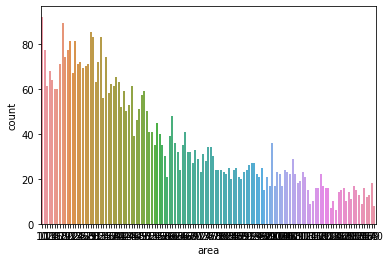

In [44]:
sns.countplot(x = "area" , data  = df_train)

interval columns not set, guessing: ['area', 'id', 'nd_mean_2021-04-15', 'nd_mean_2021-04-16', 'nd_mean_2021-04-18', 'nd_mean_2021-04-19', 'nd_mean_2021-04-20', 'nd_mean_2021-04-22', 'nd_mean_2021-04-23', 'nd_mean_2021-04-25', 'nd_mean_2021-04-26', 'nd_mean_2021-04-27', 'nd_mean_2021-04-28', 'nd_mean_2021-04-29', 'nd_mean_2021-04-30', 'nd_mean_2021-05-01', 'nd_mean_2021-05-02', 'nd_mean_2021-05-03', 'nd_mean_2021-05-04', 'nd_mean_2021-05-07', 'nd_mean_2021-05-08', 'nd_mean_2021-05-09', 'nd_mean_2021-05-10', 'nd_mean_2021-05-15', 'nd_mean_2021-05-16', 'nd_mean_2021-05-17', 'nd_mean_2021-05-19', 'nd_mean_2021-05-20', 'nd_mean_2021-05-21', 'nd_mean_2021-05-24', 'nd_mean_2021-05-26', 'nd_mean_2021-05-27', 'nd_mean_2021-05-29', 'nd_mean_2021-06-02', 'nd_mean_2021-06-03', 'nd_mean_2021-06-04', 'nd_mean_2021-06-05', 'nd_mean_2021-06-06', 'nd_mean_2021-06-07', 'nd_mean_2021-06-09', 'nd_mean_2021-06-10', 'nd_mean_2021-06-12', 'nd_mean_2021-06-13', 'nd_mean_2021-06-16', 'nd_mean_2021-06-18', 'nd

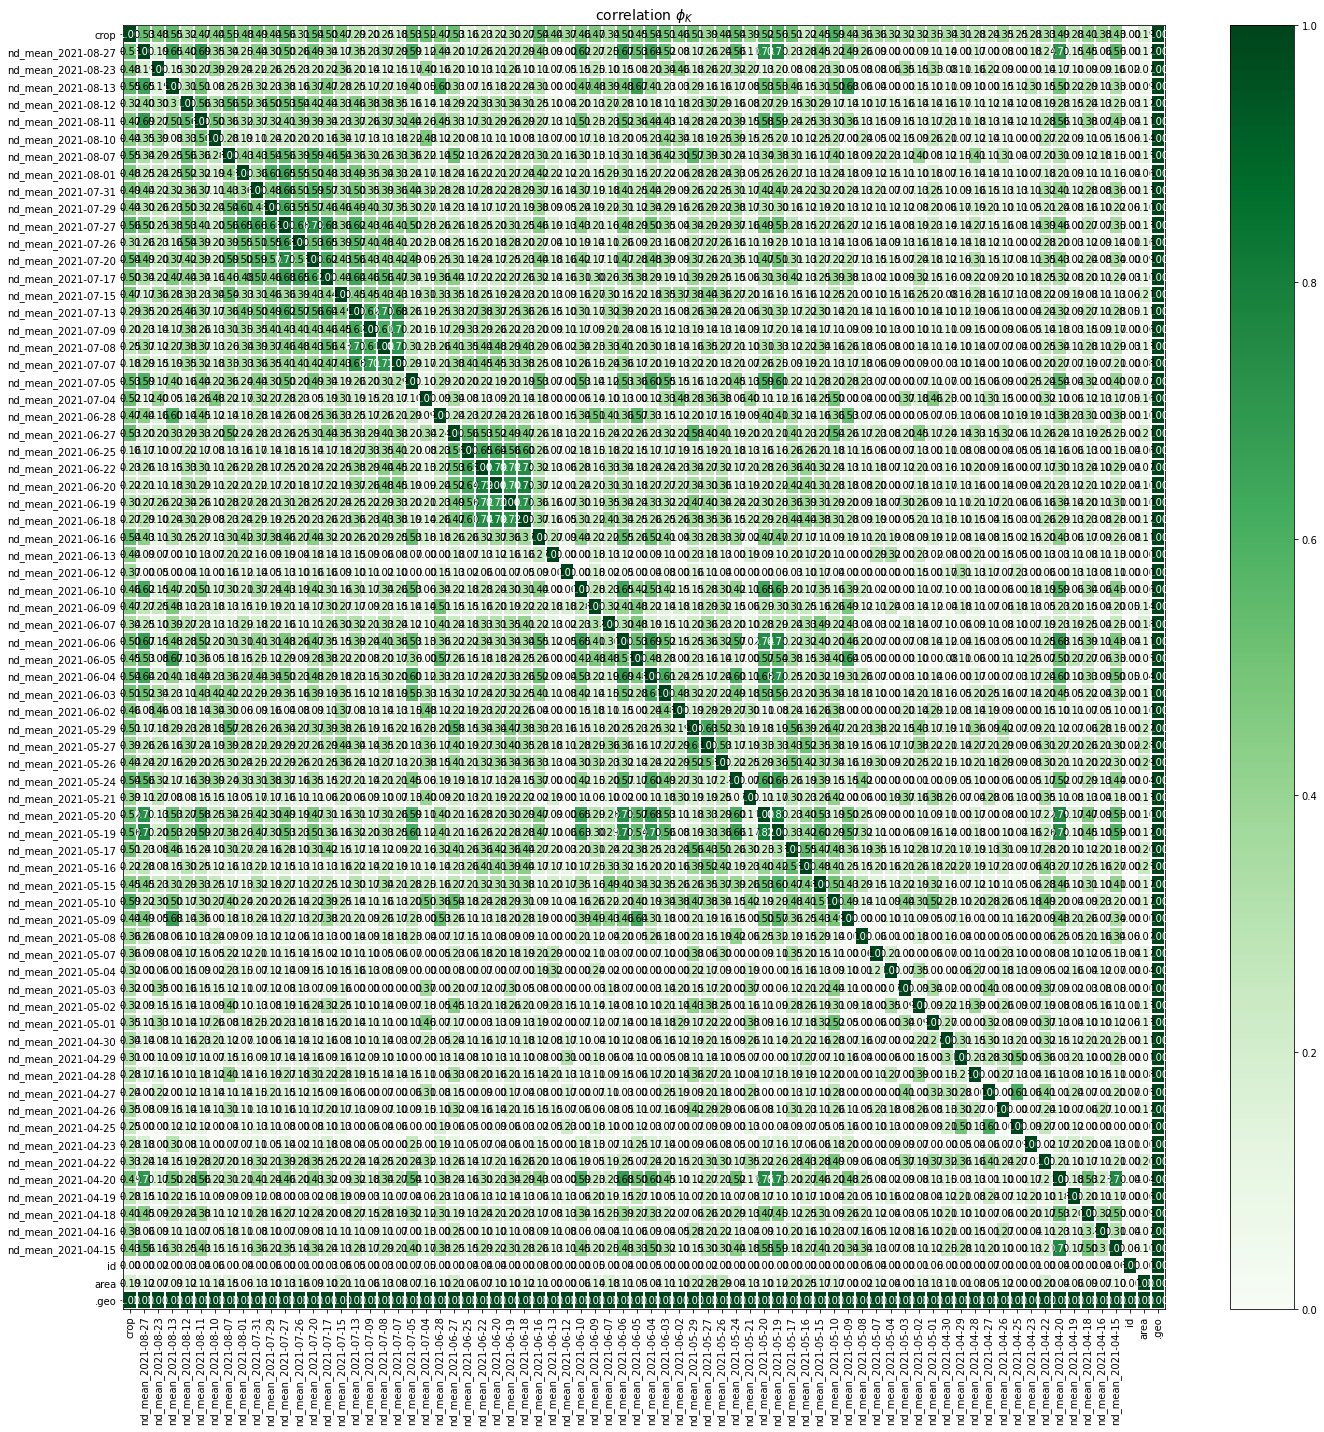

In [45]:
# Построим матрицу корреляции через фи-корреляцию (phik), c помощью 
# которой можно изучать корреляцию непрерывных категориальных признаков 
phik_overview = df_train.phik_matrix()
phik_overview = phik_overview.round(2)
# визуализируем полученную матрицу фи-корреляции
plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map="Greens", 
                        title=r"correlation $\phi_K$", 
                        #fontsize_factor=1.5, 
                        figsize=(20, 20))
plt.tight_layout()

In [46]:
%%time

# посмотрим, какие признаки модель CatBoostClassifier оценивает как наиболее важные
features_catboost_importance = df_train.drop(['crop'], axis = 1)
target_catboost_importance = df_train['crop']

cat_features_categories = list(features_catboost_importance.select_dtypes('object').columns)

catboost = CatBoostClassifier(random_seed=RANDOM_STATE, silent=True, task_type = "GPU").fit(features_catboost_importance, target_catboost_importance, cat_features=cat_features_categories)
features_importance = catboost.get_feature_importance()
pd.DataFrame(features_importance, index=features_catboost_importance.dtypes.index, columns=['Важность признаков для CatBoostClassifier'])\
    .sort_values(by='Важность признаков для CatBoostClassifier', ascending = False).style.bar()

CPU times: total: 1min 8s
Wall time: 28.8 s


,Важность признаков для CatBoostClassifier
nd_mean_2021-05-10,6.942873
nd_mean_2021-06-16,6.771138
nd_mean_2021-04-16,6.032388
nd_mean_2021-06-09,4.998295
nd_mean_2021-06-27,4.695892
nd_mean_2021-05-15,4.491095
nd_mean_2021-08-07,4.158104
nd_mean_2021-08-23,3.886625
nd_mean_2021-04-30,3.137554
nd_mean_2021-08-01,2.806612


In [47]:
# удалим нерелевантные признаки
df_train_id = df_train['id']
df_test_id = df_test['id']

df_train = df_train.drop(['.geo', 'id'], axis = 1)
df_test = df_test.drop(['.geo', 'id'], axis = 1)

In [48]:
#df_train_id.head(10)

In [49]:
#df_test_id.head(10)

In [50]:
# получим список категориальных признаков 
#features_categories = list(X_train.select_dtypes('object').columns)
#display(features_categories)

## Обучение моделей

In [51]:
# сократим датафрейм df_train для быстрого обучения и тестирования модели (или возьмем весь)
df_cat = df_train

In [52]:
# выделим признаки для обучения моделей
features_catboost = df_cat.drop(['crop'], axis = 1)
target_catboost = df_cat['crop']

In [53]:
#features_catboost.info()
#target_catboost.info()

In [54]:
# разделим датафрейм на обучающую и тестовую выборки, при этом 
# используем стратификацию (параметр stratify), чтобы сбалансировать 
# выборки по классам (для целевого признака target)

features_train_catboost, features_test_catboost, target_train_catboost, target_test_catboost = train_test_split(
    features_catboost, target_catboost, test_size=TEST_SIZE, random_state=RANDOM_STATE, stratify=target_catboost)

if features_train_catboost.shape[0]==target_train_catboost.shape[0] and features_test_catboost.shape[0]==target_test_catboost.shape[0]:
    print('All is good: sample sizes are correct')
else:
    print('Error!!! Sample sizes are NOT correct')

features_train_catboost.shape, target_train_catboost.shape, features_test_catboost.shape, target_test_catboost.shape

All is good: sample sizes are correct


((3381, 71), (3381,), (1449, 71), (1449,))

In [55]:
# получим список категориальных признаков (на случай если решили оставить '.geo' в выборке)
cat_features_categories = list(features_train_catboost.select_dtypes('object').columns)
display(cat_features_categories)

[]

In [56]:
features_train_catboost.info()
features_train_catboost.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3381 entries, 1176 to 2426
Data columns (total 71 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   area                3381 non-null   int64  
 1   nd_mean_2021-04-15  3381 non-null   float64
 2   nd_mean_2021-04-16  3381 non-null   float64
 3   nd_mean_2021-04-18  3381 non-null   float64
 4   nd_mean_2021-04-19  3381 non-null   float64
 5   nd_mean_2021-04-20  3381 non-null   float64
 6   nd_mean_2021-04-22  3381 non-null   float64
 7   nd_mean_2021-04-23  3381 non-null   float64
 8   nd_mean_2021-04-25  3381 non-null   float64
 9   nd_mean_2021-04-26  3381 non-null   float64
 10  nd_mean_2021-04-27  3381 non-null   float64
 11  nd_mean_2021-04-28  3381 non-null   float64
 12  nd_mean_2021-04-29  3381 non-null   float64
 13  nd_mean_2021-04-30  3381 non-null   float64
 14  nd_mean_2021-05-01  3381 non-null   float64
 15  nd_mean_2021-05-02  3381 non-null   float64
 16  nd_

,area,nd_mean_2021-04-15,nd_mean_2021-04-16,nd_mean_2021-04-18,nd_mean_2021-04-19,nd_mean_2021-04-20,nd_mean_2021-04-22,nd_mean_2021-04-23,nd_mean_2021-04-25,nd_mean_2021-04-26,...,nd_mean_2021-07-29,nd_mean_2021-07-31,nd_mean_2021-08-01,nd_mean_2021-08-07,nd_mean_2021-08-10,nd_mean_2021-08-11,nd_mean_2021-08-12,nd_mean_2021-08-13,nd_mean_2021-08-23,nd_mean_2021-08-27
1176,81,0.172895,0.266653,0.301852,0.290511,0.051965,0.105511,0.010080,0.069077,0.090413,...,0.415895,0.043886,0.507220,0.189622,0.006041,0.403121,0.409780,0.147528,0.029544,0.188917
3308,65,0.309465,0.274620,0.328327,0.289620,0.310487,0.156005,0.182881,0.310811,0.078018,...,0.560280,0.167369,0.604143,0.157659,0.136230,0.546694,0.557462,0.547936,0.095118,0.566521
1931,90,0.244273,0.027151,0.047839,0.026162,0.198786,0.061293,0.279105,0.053304,0.164989,...,0.434134,0.184683,0.011883,0.185402,0.065631,0.020427,0.320899,0.132065,0.059628,0.420390
1989,53,0.227902,0.187843,0.102411,0.022121,0.075231,0.298813,0.066435,0.158028,0.276356,...,0.258448,0.371205,0.081447,0.371043,0.153447,0.041217,0.056212,0.131861,0.129323,0.048725
3141,23,0.003880,0.116110,0.126890,0.205817,0.125369,0.235254,0.053392,0.052714,0.089733,...,0.717886,0.006190,0.308183,0.140279,0.095694,0.120809,0.640734,0.115389,0.606596,0.201124


### CatBoostClassifier

In [57]:
# сбалансируем классы для модели (существенного дисбаланса не выявлено, но это может улучшить метрику)
classes = np.unique(target_train_catboost)
weights = compute_class_weight(class_weight='balanced', classes=classes, y=target_train_catboost)
class_weights_catboost = dict(zip(classes, weights))
print(class_weights_catboost)

{0: 0.9507874015748031, 1: 0.9857142857142858, 2: 0.9897540983606558, 3: 1.054585152838428, 4: 0.9602385685884692, 5: 1.0320512820512822, 6: 1.036480686695279}


In [58]:
%%time

catboost = CatBoostClassifier(random_seed=RANDOM_STATE, 
                              silent=True,
                              class_weights=class_weights_catboost)

catboost_params = {
 'depth': [10],
 'iterations': [1200],
 'learning_rate': [0.02],
 'loss_function': ["MultiClassOneVsAll"],
 'l2_leaf_reg': [3],
 'task_type': ["GPU"]    
}


grid_search_catboost = GridSearchCV(catboost,
                                   catboost_params,                                   
                                   verbose=2,
                                   cv=5,
                                   #n_jobs=-1,
                                   #scoring=metric_from_assignment
                                   scoring='recall_macro')

grid_search_catboost.fit(features_train_catboost, target_train_catboost, cat_features=cat_features_categories)

print(" --------------------------------------------------------------------------" )
print(" --------------------------------------------------------------------------" )
print(" Results from Grid Search " )
print("\n The best score across ALL searched params:\n", grid_search_catboost.best_score_)
print("\n The best parameters across ALL searched params:\n", grid_search_catboost.best_params_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END depth=10, iterations=1200, l2_leaf_reg=3, learning_rate=0.02, loss_function=MultiClassOneVsAll, task_type=GPU; total time= 1.0min
[CV] END depth=10, iterations=1200, l2_leaf_reg=3, learning_rate=0.02, loss_function=MultiClassOneVsAll, task_type=GPU; total time= 1.0min
[CV] END depth=10, iterations=1200, l2_leaf_reg=3, learning_rate=0.02, loss_function=MultiClassOneVsAll, task_type=GPU; total time= 1.1min
[CV] END depth=10, iterations=1200, l2_leaf_reg=3, learning_rate=0.02, loss_function=MultiClassOneVsAll, task_type=GPU; total time= 1.0min
[CV] END depth=10, iterations=1200, l2_leaf_reg=3, learning_rate=0.02, loss_function=MultiClassOneVsAll, task_type=GPU; total time= 1.1min
 --------------------------------------------------------------------------
 --------------------------------------------------------------------------
 Results from Grid Search 

 The best score across ALL searched params:
 0.9525342973703401

 

### LightGBM

In [60]:
class_weights_lgbm = [class_weights_catboost]

In [61]:
print(class_weights_lgbm)

[{0: 0.9507874015748031, 1: 0.9857142857142858, 2: 0.9897540983606558, 3: 1.054585152838428, 4: 0.9602385685884692, 5: 1.0320512820512822, 6: 1.036480686695279}]


In [62]:
class_weights_lgbm = [{0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 4}]

In [63]:
%%time

X_train_lgbm = features_train_catboost
y_train_lgbm = target_train_catboost

pipe_lgbm = Pipeline(steps=[('scaler', StandardScaler()),
                            ('lgbm', LGBMClassifier(random_state=RANDOM_STATE,
                                                    objective='multiclassova',
                                                    silent=True,
                                                    class_weight={0: 1, 
                                                                  1: 1,
                                                                  2: 1,
                                                                  3: 1,
                                                                  4: 1,
                                                                  5: 1,
                                                                  6: 3}))])

lgbm_params = {
 'lgbm__max_depth': [10],
 'lgbm__n_estimators': [1000],
 'lgbm__learning_rate': [0.02]
# 'class_weight': class_weights_lgbm, 
# 'categorical_feature': features_categories
}

grid_search_lgbm = GridSearchCV(pipe_lgbm,
                                lgbm_params, 
                                verbose=2,
                                cv=3,
                                n_jobs=-1,
                                scoring='recall_macro')

grid_search_lgbm.fit(X_train_lgbm, y_train_lgbm)

print(" --------------------------------------------------------------------------" )
print(" --------------------------------------------------------------------------" )
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n", grid_search_lgbm.best_estimator_)
print("\n The best score across ALL searched params:\n", grid_search_lgbm.best_score_)
print("\n The best parameters across ALL searched params:\n", grid_search_lgbm.best_params_)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
 --------------------------------------------------------------------------
 --------------------------------------------------------------------------
 Results from Grid Search 

 The best estimator across ALL searched params:
 Pipeline(steps=[('scaler', StandardScaler()),
                ('lgbm',
                 LGBMClassifier(class_weight={0: 1, 1: 1, 2: 1, 3: 1, 4: 1,
                                              5: 1, 6: 3},
                                learning_rate=0.02, max_depth=10,
                                n_estimators=1000, objective='multiclassova',
                                random_state=20221120, silent=True))])

 The best score across ALL searched params:
 0.9532736483742904

 The best parameters across ALL searched params:
 {'lgbm__learning_rate': 0.02, 'lgbm__max_depth': 10, 'lgbm__n_estimators': 1000}
CPU times: total: 3min 30s
Wall time: 1min 52s


## Оценка точности моделей

### Оценка точности: CatBoostClassifier

In [64]:
# получим предсказания
pred_cat = grid_search_catboost.predict(features_test_catboost)
score = recall_score(target_test_catboost, pred_cat, average = "macro")
print("Recall", score)

Recall 0.955054335524874


In [65]:
# сохраним модель на диск для последующей загрузки без долгого обучения
filename_saved_model_cat = 'innopolis_cat_finalized_model.sav'
pickle.dump(grid_search_catboost, open(filename_saved_model_cat, 'wb'))

In [66]:
# загрузим модель с диска
loaded_model_cat = pickle.load(open(filename_saved_model_cat, 'rb'))

In [67]:
pred_loaded_cat_solution = loaded_model_cat.predict(df_test)
#print(pred_loaded_cat_solution)

Text(0.5, 1, 'CatBoost: матрица ошибок')

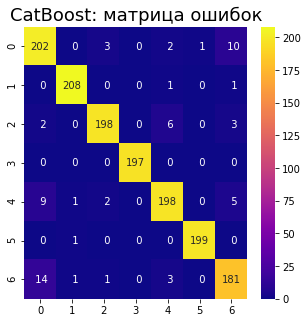

In [68]:
# построим матрицу ошибок
pred_loaded_cat = loaded_model_cat.predict(features_test_catboost)

plt.figure(figsize=(5, 5))
sns.heatmap(confusion_matrix(target_test_catboost, pred_loaded_cat),annot=True,fmt='3.0f',cmap="plasma")
plt.title('CatBoost: матрица ошибок', y=1, size=18)

### Оценка точности: LightGBM

In [69]:
# получим предсказания
pred_lgbm = grid_search_lgbm.predict(features_test_catboost)
score = recall_score(target_test_catboost, pred_lgbm, average = "macro")
print("Recall", score)

Recall 0.9619096419605931


Text(0.5, 1, 'LightGBM: матрица ошибок')

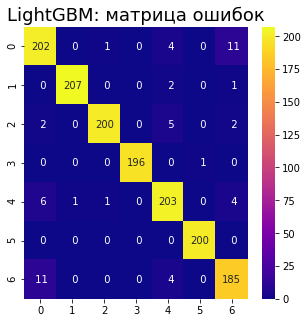

In [70]:
# построим матрицу ошибок для LGBM
plt.figure(figsize=(5, 5))
sns.heatmap(confusion_matrix(target_test_catboost, pred_lgbm),annot=True,fmt='3.0f',cmap="plasma")
plt.title('LightGBM: матрица ошибок', y=1, size=18)

## Выгрузка итоговых решений

### Выгрузка итогового решения CatBoostClassifier в ".csv"

In [71]:
# создадим датасет c предсказаниями
y_pred = pred_loaded_cat_solution
df_y_pred = pd.DataFrame(y_pred)
df_y_pred.rename(columns = {0 : 'crop'}, inplace = True)
#display(df_y_pred)

# посмотрим статистики
#df_y_pred.describe()

In [72]:
# объединим в датасет 
df_sample_solution_final_catboost = df_y_pred
df_sample_solution_final_catboost['id'] = df_sample_solution['id']
df_sample_solution_final_catboost = df_sample_solution_final_catboost[['id', 'crop']]

df_sample_solution_final_catboost['id'] = df_sample_solution_final_catboost['id'].astype('int')
df_sample_solution_final_catboost['crop'] = df_sample_solution_final_catboost['crop'].astype('int')

#display(df_sample_solution_final_catboost)
#df_sample_solution_final_catboost.describe()

In [73]:
# итоговые метрики:
print("           GridSearch =", grid_search_catboost.best_score_)
print("           ! Recall   =", score) 
#print('                score =')
#print("              ROC-AUC =", auc_roc)
print("\n The best parameters across ALL searched params:\n", grid_search_catboost.best_params_)

           GridSearch = 0.9525342973703401
           ! Recall   = 0.9619096419605931

 The best parameters across ALL searched params:
 {'depth': 10, 'iterations': 1200, 'l2_leaf_reg': 3, 'learning_rate': 0.02, 'loss_function': 'MultiClassOneVsAll', 'task_type': 'GPU'}


In [74]:
# сохраним результат предсказания в 'csv' файл
df_sample_solution_final_catboost.to_csv('df_sample_solution_final_catboost_innopolis.csv', sep=",", index=False, line_terminator='\n')

### Выгрузка итогового решения LightGBM в ".csv"

In [75]:
# создадим датасет c предсказаниями
y_pred = pred_lgbm
df_y_pred = pd.DataFrame(y_pred)
df_y_pred.rename(columns = {0 : 'crop'}, inplace = True)
#display(df_y_pred)

# посмотрим статистики
#df_y_pred.describe()

In [76]:
# объединим в датасет 
df_sample_solution_final_pred_lgbm = df_y_pred
df_sample_solution_final_pred_lgbm['id'] = df_sample_solution['id']
df_sample_solution_final_pred_lgbm = df_sample_solution_final_pred_lgbm[['id', 'crop']]

df_sample_solution_final_pred_lgbm['id'] = df_sample_solution_final_pred_lgbm['id'].astype('int')
df_sample_solution_final_pred_lgbm['crop'] = df_sample_solution_final_pred_lgbm['crop'].astype('int')

#display(df_sample_solution_final_pred_lgbm)
#df_sample_solution_final_pred_lgbm.describe()

In [77]:
# итоговые метрики:
print("           GridSearch =", grid_search_lgbm.best_score_)
print("           ! Recall   =", score) 
#print('                score =')
#print("              ROC-AUC =", auc_roc)
print("\n The best parameters across ALL searched params:\n", grid_search_lgbm.best_params_)

           GridSearch = 0.9532736483742904
           ! Recall   = 0.9619096419605931

 The best parameters across ALL searched params:
 {'lgbm__learning_rate': 0.02, 'lgbm__max_depth': 10, 'lgbm__n_estimators': 1000}


In [78]:
# сохраним результат предсказания в 'csv' файл
df_sample_solution_final_catboost.to_csv('df_sample_solution_final_lgbm_innopolis.csv', sep=",", index=False, line_terminator='\n')